In [25]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Order1.csv")
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [27]:
basket = data.groupby(['Member_number', 'itemDescription']).size().unstack(fill_value=0)
basket = basket.apply(lambda x: x > 0).astype(int)
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
num_itemsets = len(frequent_itemsets)
rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric="confidence", min_threshold=0.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(UHT-milk),(bottled water),0.078502,0.213699,0.021293,0.271242,1.269268,1.0,0.004517,1.078960,0.230217,0.078598,0.073181,0.185441
1,(UHT-milk),(other vegetables),0.078502,0.376603,0.038994,0.496732,1.318979,1.0,0.009430,1.238697,0.262440,0.093711,0.192700,0.300137
2,(UHT-milk),(pip fruit),0.078502,0.170600,0.017188,0.218954,1.283434,1.0,0.003796,1.061909,0.239654,0.074115,0.058300,0.159853
3,(UHT-milk),(rolls/buns),0.078502,0.349666,0.031042,0.395425,1.130863,1.0,0.003592,1.075687,0.125578,0.078165,0.070361,0.242100
4,(UHT-milk),(root vegetables),0.078502,0.230631,0.021036,0.267974,1.161916,1.0,0.002931,1.051013,0.151224,0.073019,0.048537,0.179593


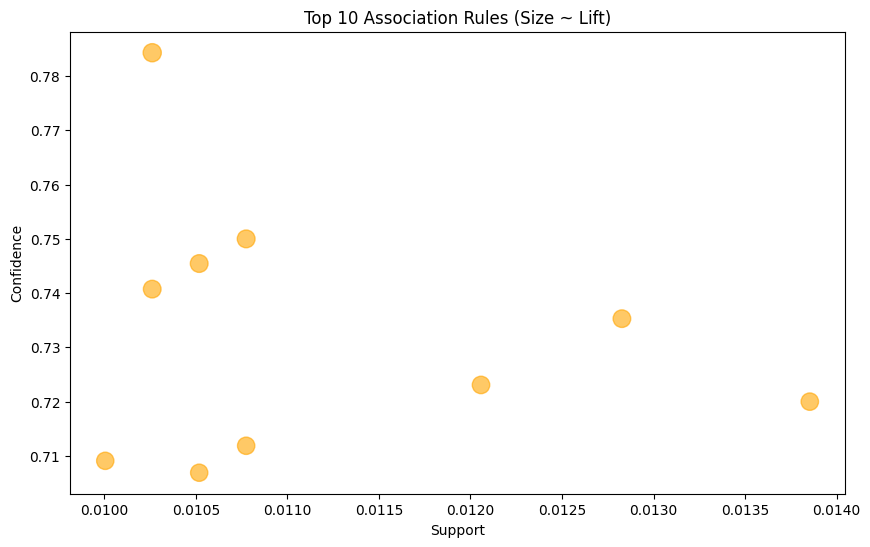

In [28]:
# Step 4: Visualize the Top Association Rules
top_rules = rules.sort_values(by="confidence", ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.scatter(top_rules['support'], top_rules['confidence'], s=top_rules['lift']*100, c='orange', alpha=0.6)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Top 10 Association Rules (Size ~ Lift)')
plt.show()